# Support Vector Regression

SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.

We now have an additional hyperparameter, C, that we can tune. As C increases, our tolerance for points outside of ϵ also increases. As C approaches 0, the tolerance approaches 0 and the equation collapses into the simplified (although sometimes infeasible) one.

Sticky notes
- In simple regression we try to minimise the error rate. While in SVR we try to fit the error within a certain threshold. 
- Do not use a maximal margin >>> Soft margin (support vector)
- Linear and nonlinear Regression
- hyper parameter Epsilon (-Regularization : Bias/Variance trade off)
- Linear Regression in a higher dimensional space
- Choose kernel Gaussian / and Noise
- It is necessary to scale the features

C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

SVR - C=0.01
Score in the entire dataset: -0.14068
SVR - C=1
Score in the entire dataset: 0.75160
SVR - C=100
Score in the entire dataset: 0.99275
SVR - C=1000
Score in the entire dataset: 0.99275


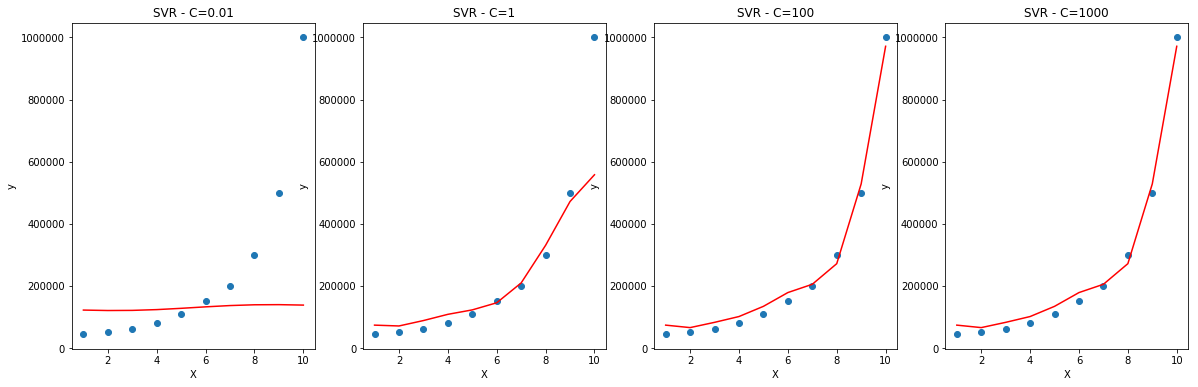

In [59]:
### Building a Regression Template ###

# Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

# Import data
dataset=pd.read_csv(r'../../Data Science/Cursos Online/Udemy/Machine-Learning-A-Z-New/Machine Learning A-Z New/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv')
X=dataset.iloc[:,1:2].values
y=dataset.iloc[:,2:3].values

# Splitting training and testing (for the polinomial transformation)
# from sklearn.model_selection import train_test_split as tts
# X_train, X_test, y_train, y_test= tts(X,y, test_size=1/3, random_state=0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X=sc_X.fit_transform(X)
sc_y=StandardScaler()
y=sc_y.fit_transform(y)

fig,axes=plt.subplots(1,4,figsize=(20,6))

for ax,param_C in zip(axes,[0.01, 1, 100, 1000]):
    # Fitting the Regression Model to the Dataset
    regressor= SVR(kernel='rbf', C=param_C)
    ## rbd: Gaussian Kenrel
    regressor.fit(X, y)

    # Predicting a new result with Regression Model
    y_pred=regressor.predict(X)

    # Visualising the Regression Model Result
    X_grid=np.arange(min(X),max(X),0.1)
    X_grid=X_grid.reshape(-1,1)

    ax.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y))
    ax.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(regressor.predict(X)), color='red')
#     ax.plot(X_grid,regressor.predict(X_grid), color='blue')
    ax.set_title('SVR - C={}'.format(param_C))
    ax.set_xlabel('X')
    ax.set_ylabel('y')
#     ax.subplots_adjust(bottom=0.15)

    print('SVR - C={}'.format(param_C))
    print('Score in the entire dataset: {0:.5f}'.format(regressor.score(X, y)))
    # print('Score in the training dataset: {0:.5f}'.format(regressor.score(X_train, y_train)))

    # print('Score in the entire dataset: {0:.5f}\n'.format(regressor.score(X_test, y_test)))

In [1]:
## CASE 2  - House Pricing versus Number of rooms##

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from sklearn.datasets import load_boston

boston=load_boston()


In [50]:
dataset= pd.DataFrame(boston.data, columns=boston.feature_names)
dataset['HP']=boston.target

In [51]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HP
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


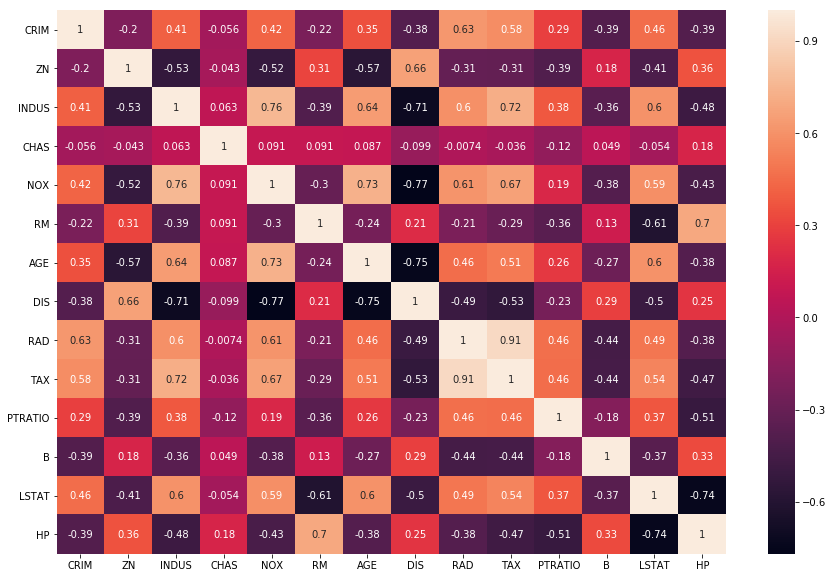

In [52]:
## Compute pairwise correlation of columns, excluding NA/null values.

import seaborn as sns
plt.figure(figsize=(15,10))
sns.heatmap(dataset.corr(), annot=True)

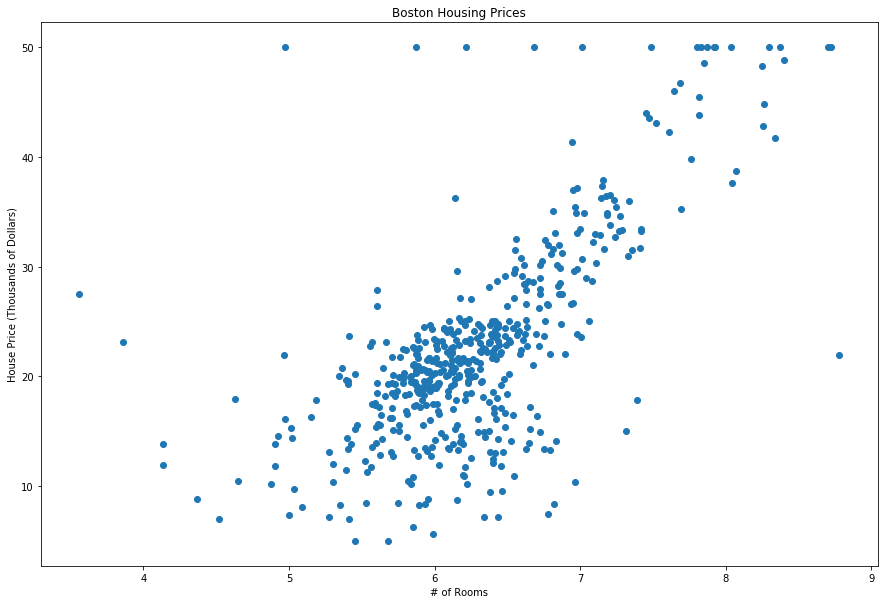

In [40]:
plt.figure(figsize=(15,10))
plt.scatter(x=dataset['RM'], y=boston.target)
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousands of Dollars)')
plt.title('Boston Housing Prices')
plt.show()

In [53]:
abs(dataset.corr())['HP'].sort_values(ascending=False)

HP         1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: HP, dtype: float64

Linear Regression
Score in the entire dataset: 0.48330
Score in the training dataset: 0.49877
Score in the entire dataset: 0.44685

Description:
Coeff: 9.29194
Intercept: -35.83044
MAE: US$4320.67


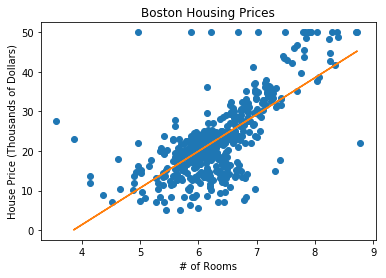

In [110]:
from sklearn.linear_model import LinearRegression

X=dataset['RM'].values.reshape(-1,1)
y=boston.target.reshape(-1,1)

# Splitting training and testing (for the polinomial transformation)
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=1/3, random_state=0)

#Definining Linear Regression model
lin=LinearRegression()
lin.fit(X_train, y_train)
y_pred=lin.predict(X_test)

X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(-1,1)

plt.plot(X,y,'o')
plt.plot(X_test,y_pred)
plt.xlabel('# of Rooms')
plt.ylabel('House Price (Thousands of Dollars)')
plt.title('Boston Housing Prices')

print('Linear Regression')
print('Score in the entire dataset: {0:.5f}'.format(lin.score(X, y)))
print('Score in the training dataset: {0:.5f}'.format(lin.score(X_train, y_train)))
print('Score in the entire dataset: {0:.5f}\n'.format(lin.score(X_test, y_test)))
print('Description:')
print('Coeff: {0:.5f}'.format(lin.coef_[0][0]))
print('Intercept: {0:.5f}'.format(lin.intercept_[0]))

from sklearn.metrics import mean_absolute_error 
mae = mean_absolute_error(y_test, lin.predict(X_test))

print('MAE: US${0:.2f}'.format(1000*mae))

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

In [115]:
def svr_results(y_test, X_test, fitted_svr_model):
    
    print("C: {}".format(fitted_svr_model.C))
    print("Epsilon: {}".format(fitted_svr_model.epsilon))
    
    print("Intercept: {:,.3f}".format(fitted_svr_model.intercept_[0]))
    print("Coefficient: {:,.3f}".format(fitted_svr_model.coef_[0]))
    
    mae = mean_absolute_error(y_test, fitted_svr_model.predict(X_test))
    print("MAE = ${:,.2f}".format(1000*mae))
    
    perc_within_eps = 100*np.sum(y_test - fitted_svr_model.predict(X_test) < eps) / len(y_test)
    print("Percentage within Epsilon = {:,.2f}%".format(perc_within_eps))
    
    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.plot(X,y,'o')
    plt.plot(X_test, fitted_svr_model.predict(X_test), color='red')
    plt.plot(X_test, fitted_svr_model.predict(X_test)+eps, color='black')
    plt.plot(X_test, fitted_svr_model.predict(X_test)-eps, color='black')
    plt.xlabel('# of Rooms')
    plt.ylabel('House Price (Thousands of Dollars)')
    plt.title('SVR Prediction')
    plt.show()

C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\fabio\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Description:
Epsilon: 5.00
C: 0.00001
Coeff: 0.02524
Intercept: 0.00402
MAE: US$22926.65
Percentage within Epsilon = 0.000%

Score:
Score in the entire dataset: -5.92514
Score in the training dataset: -5.81059
Score in the entire dataset: -6.43012

Description:
Epsilon: 5.00
C: 0.01000
Coeff: 3.13844
Intercept: 0.36931
MAE: US$5884.86
Percentage within Epsilon = 74.039%

Score:
Score in the entire dataset: 0.20546
Score in the training dataset: 0.21131
Score in the entire dataset: 0.17758

Description:
Epsilon: 5.00
C: 1.00000
Coeff: 5.15881
Intercept: -9.97498
MAE: US$4921.85
Percentage within Epsilon = 79.461%

Score:
Score in the entire dataset: 0.39268
Score in the training dataset: 0.39228
Score in the entire dataset: 0.39147

Description:
Epsilon: 5.00
C: 100.00000
Coeff: 9.29790
Intercept: -38.63903
MAE: US$5533.74
Percentage within Epsilon = 63.324%

Score:
Score in the entire dataset: 0.39451
Score in the training dataset: 0.40194
Score in the entire dataset: 0.36099

Descript

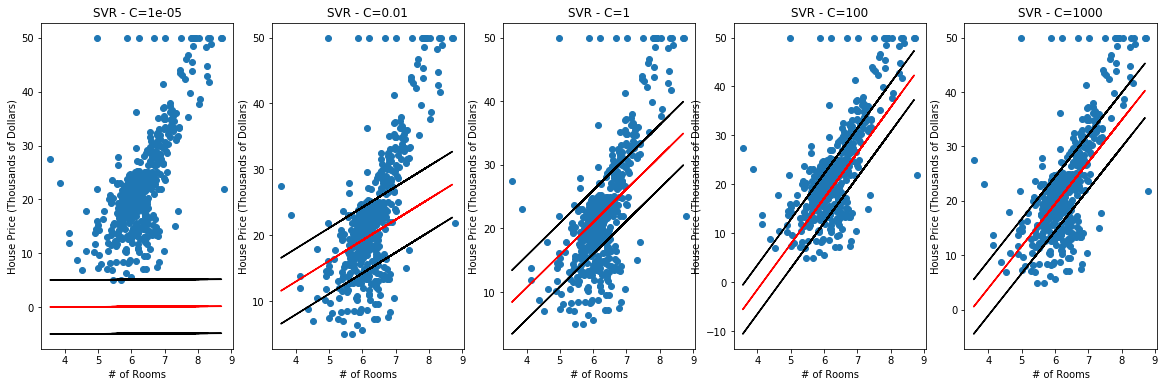

In [161]:
### Building a Regression Template ###

# Import Libraries
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVR

X=dataset['RM'].values.reshape(-1,1)
y=boston.target.reshape(-1,1)

# Splitting training and testing (for the polinomial transformation)
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test= tts(X,y, test_size=0.2, random_state=12)

# param_C=0.01
eps=5

fig, axes= plt.subplots(1,5,figsize=(20,6))

for param_C,ax in zip([0.00001, 0.01, 1, 100, 1000],axes):
    regressor= LinearSVR(epsilon=eps , C=param_C, fit_intercept=True)
    regressor.fit(X_train, y_train)

    # Predicting a new result with Regression Model
    y_pred=regressor.predict(X_test)

    ax.scatter(X,y)
    # plt.scatter(sc_X.inverse_transform(X_train),sc_y.inverse_transform(y_train))
    ax.plot(X_test,y_pred, color='red')
    ax.plot(X_test,y_pred+eps, color='black')
    ax.plot(X_test,y_pred-eps, color='black')
    ax.set_title('SVR - C={}'.format(param_C))
    ax.set_xlabel('# of Rooms')
    ax.set_ylabel('House Price (Thousands of Dollars)')

    print('Description:')
    print('Epsilon: {0:.2f}'.format(regressor.epsilon))
    print('C: {0:.5f}'.format(regressor.C))
    print('Coeff: {0:.5f}'.format(regressor.coef_[0]))
    print('Intercept: {0:.5f}'.format(regressor.intercept_[0]))

    from sklearn.metrics import mean_absolute_error 
    mae = mean_absolute_error(y_test, regressor.predict(X_test))
    print('MAE: US${0:.2f}'.format(1000*mae))

    perc_within_eps = (np.sum(y_test - regressor.predict(X_test) < eps) / len(y_test))
    print("Percentage within Epsilon = {0:.3f}%".format(perc_within_eps))

    print('\nScore:')
    print('Score in the entire dataset: {0:.5f}'.format(regressor.score(X, y)))
    print('Score in the training dataset: {0:.5f}'.format(regressor.score(X_train, y_train)))
    print('Score in the entire dataset: {0:.5f}\n'.format(regressor.score(X_test, y_test)))